## FE & EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data

In [2]:
df = pd.read_csv('../data Raw/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [76]:
df_copy = pd.read_csv('../data Raw/housing.csv')

In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### ---------appraoch to the FE&EDA-------------

In [6]:
### So far ocean proximity is the only categorical feature in our dataset
### an I will use label encoding for that one
### I will substitute the nan values in total_bedroom columns
### then the rest I will do by looking at the features and their qq plot
### I will make new columns for the correaltions like
### bedrooms_per_room, households_per_bedroom, population_per_household

### -----------------FE&EDA--------------------

### Ocean proximity columns

In [4]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df['ocean_proximity'].isna().sum()

0

In [5]:
ocean_proxim = {
    '<1H OCEAN' : 1,
    'INLAND' : 0,
    'NEAR BAY' : 2,
    'NEAR OCEAN' : 3,
    'ISLAND' : 5
}

In [6]:
df['ocean_proximity'] = df['ocean_proximity'].map(ocean_proxim)

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
1    9136
0    6551
3    2658
2    2290
5       5
Name: count, dtype: int64

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


### Handling nan in total_bedrrom

In [9]:
df['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

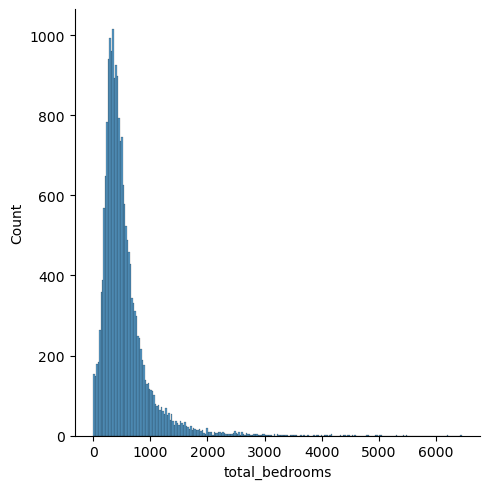

In [10]:
sns.displot(df['total_bedrooms'])

In [11]:
df['total_bedrooms'].median()

435.0

In [17]:
### substituting the nan with the median
### because there aren't a lot of missing nan values

In [12]:
df['total_bedrooms'].fillna(435.0, inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24288\1849391468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(435.0, inplace = True)


In [13]:
df['total_bedrooms'].isna().sum()

0

In [14]:
df['total_bedrooms'].value_counts()

total_bedrooms
435.0     244
280.0      55
331.0      51
345.0      50
343.0      49
         ... 
2961.0      1
1915.0      1
1215.0      1
3298.0      1
1052.0      1
Name: count, Length: 1923, dtype: int64

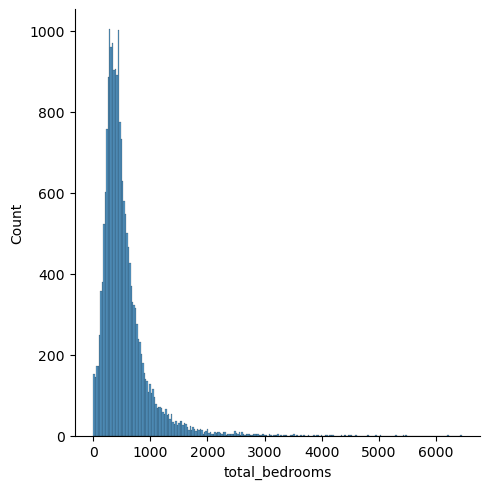

In [15]:
sns.displot(df['total_bedrooms'])

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


In [17]:
corr = df.corr()['median_house_value'].sort_values(ascending = False)
print(corr)

median_house_value    1.000000
median_income         0.688075
ocean_proximity       0.383280
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


### making the new columns and dropping the older ones

In [18]:
df['rooms_per_bedroom'] = df['total_rooms'] / df['total_bedrooms']

In [19]:
df['rooms_per_bedroom'] = df['rooms_per_bedroom'].astype(int)

In [20]:
df['rooms_per_bedroom'].value_counts()

rooms_per_bedroom
4     6685
5     5948
3     3538
6     2610
7      908
2      574
8      235
1       86
9       19
10      13
11       5
0        5
12       3
14       3
13       2
15       2
20       1
23       1
18       1
26       1
Name: count, dtype: int64

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5


In [22]:
df['population_per_household'] = df['population'] / df['households']

In [23]:
df['population_per_household'] = df['population_per_household'].astype(int)

In [24]:
df['population_per_household'].value_counts()

population_per_household
2       10984
3        6273
1        1630
4        1404
5         231
6          45
7          17
9           9
12          8
8           7
13          4
18          3
0           3
10          3
11          2
15          2
16          2
599         1
33          1
1243        1
502         1
51          1
63          1
230         1
14          1
17          1
83          1
41          1
21          1
19          1
Name: count, dtype: int64

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5,2


In [26]:
df['bedroom_per_household'] = df['total_bedrooms'] / df['households']
df['bedroom_per_household'] = df['bedroom_per_household'].astype(int)

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6,2,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6,2,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7,2,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5,2,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5,2,1


In [28]:
df['room_per_household'] = df['total_rooms'] / df['households']
df['room_per_household'] = df['room_per_household'].astype(int)

In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5,2,1,6


### dropping the features

In [30]:
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [31]:
corr = df.corr()['median_house_value'].sort_values(ascending = False)
print(corr)

median_house_value          1.000000
median_income               0.688075
ocean_proximity             0.383280
rooms_per_bedroom           0.359648
room_per_household          0.151219
housing_median_age          0.105623
population_per_household   -0.024399
bedroom_per_household      -0.039430
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64


### QQ plot and outliers part

In [32]:
import pylab
import scipy.stats as stat

In [57]:
def plot_qq(df, feature) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

def plot_both(df, feature) : 
    sns.boxplot(df[feature])
    plot_qq(df, feature)

### ------------outliers--------------

In [34]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


### longitude

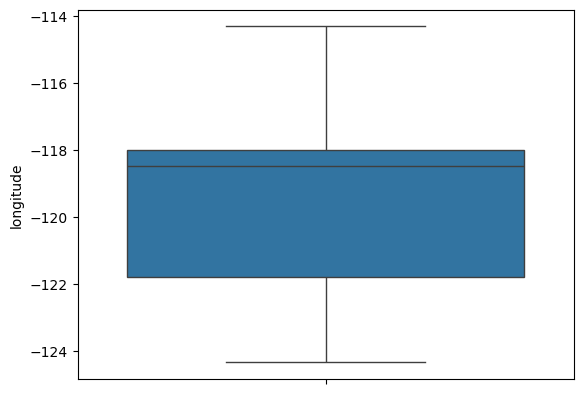

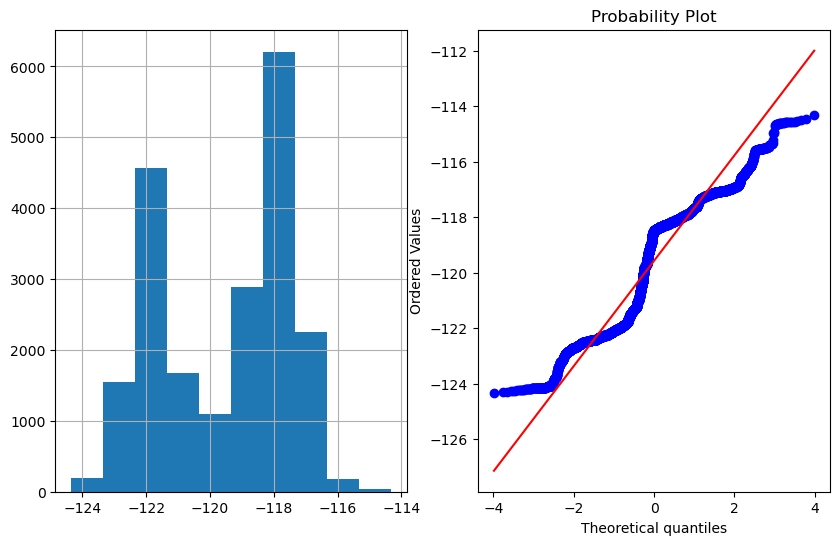

In [58]:
plot_both(df, 'longitude')

### latitude

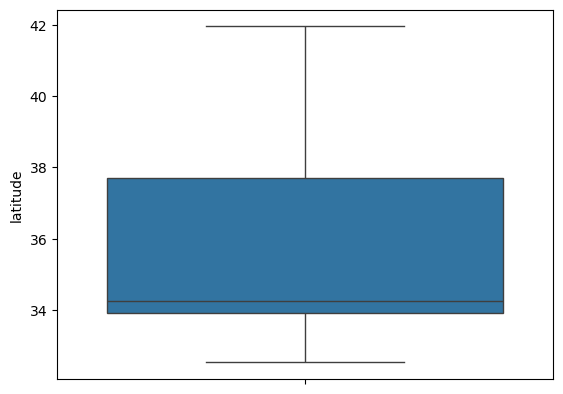

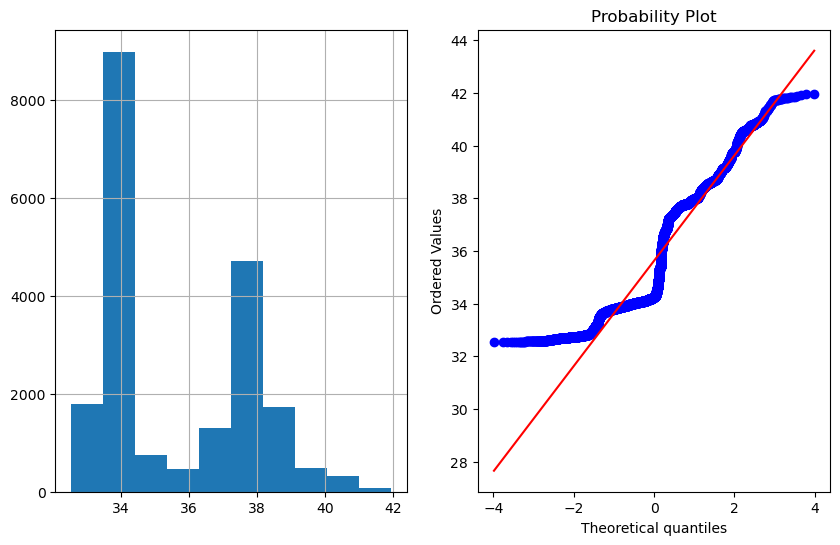

In [59]:
plot_both(df, 'latitude')

### housing_median_age

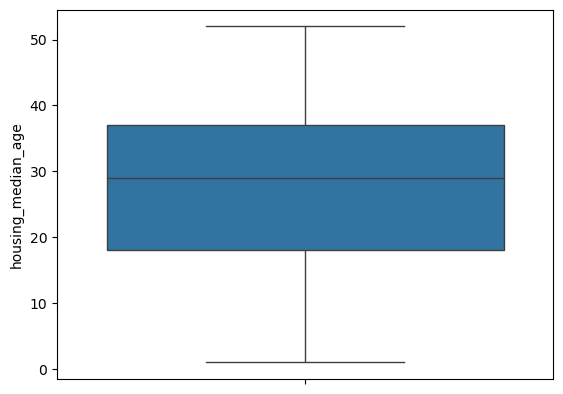

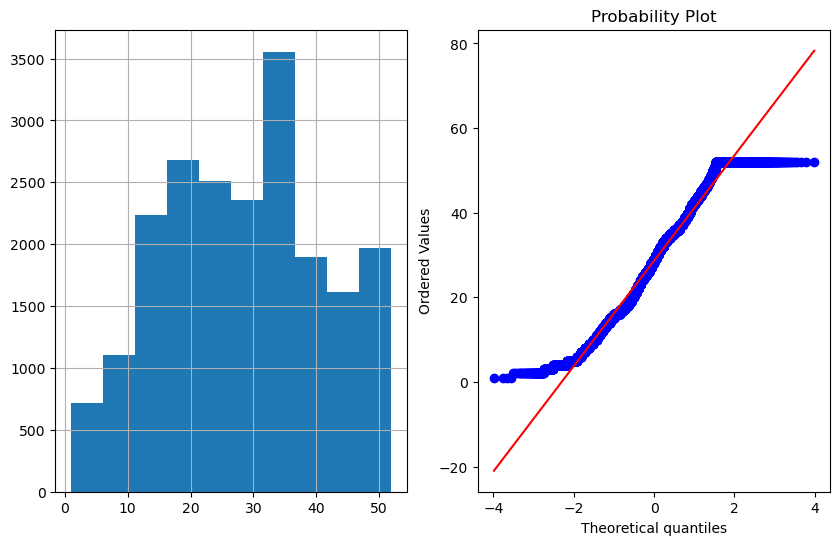

In [60]:
plot_both(df, 'housing_median_age')

### median_income

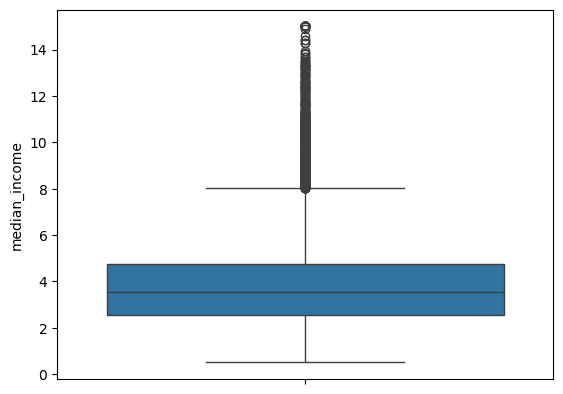

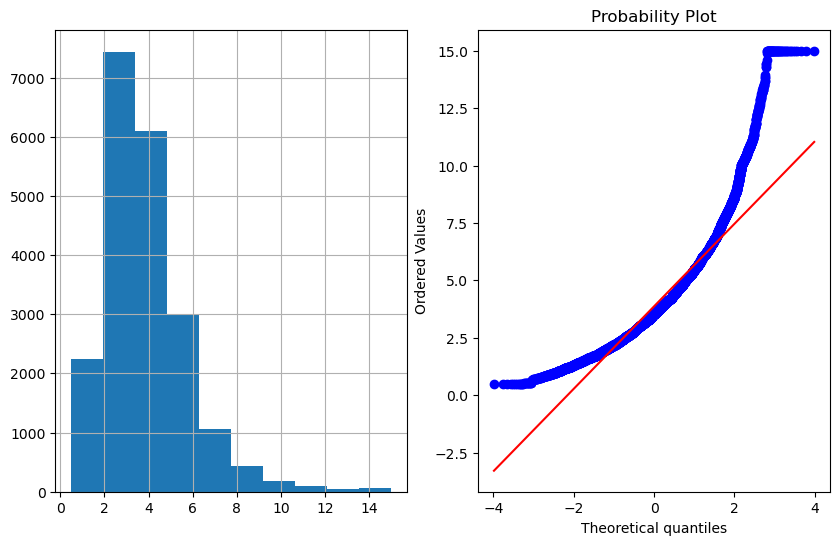

In [61]:
plot_both(df, 'median_income')

In [48]:
### removing the outliers

In [49]:
Q3 = df['median_income'].quantile(0.75)
Q1 = df['median_income'].quantile(0.25)

In [52]:
print(f"{Q3} :: {Q1} :: {df['median_income'].max()} :: {df['median_income'].min()}")

4.74325 :: 2.5633999999999997 :: 15.0001 :: 0.4999


In [68]:
IQR = Q3-Q1
print(f"{Q1 - 1.5*IQR} :: {Q3 + 1.5 * IQR}")

-0.7063750000000004 :: 8.013024999999999


In [69]:
df['median_income'] = df['median_income'].apply(lambda x : 8.2 if x > 8.2 else x)

In [78]:
print(f"{df['median_income'].min()} :: {df['median_income'].max()}")

0.4999 :: 8.2


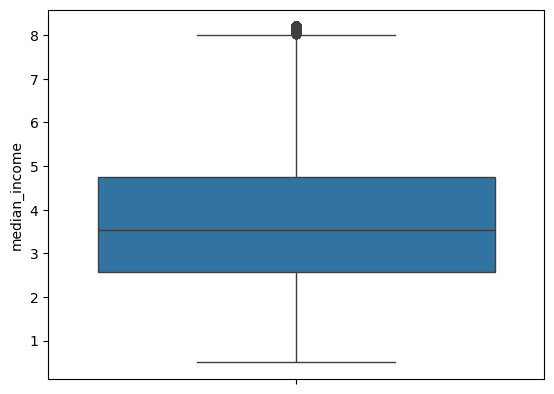

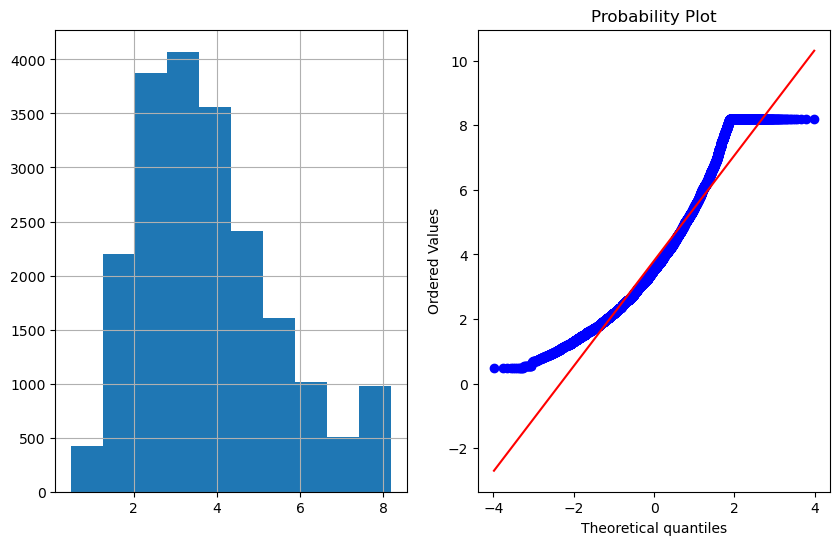

In [71]:
plot_both(df, 'median_income')

In [72]:
### I removed the outlier from the data but for the tree based algos, I will keep it the same

In [73]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.2000,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.2000,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


### median_house_value

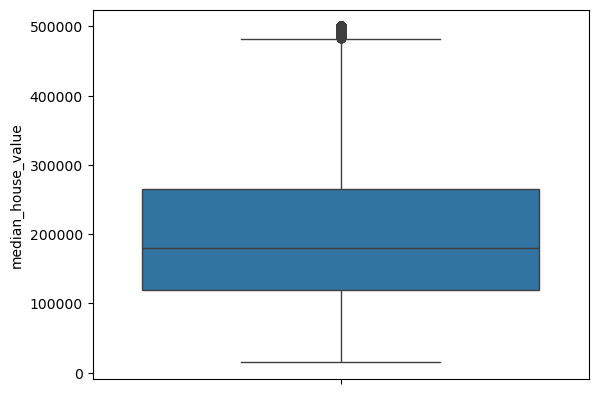

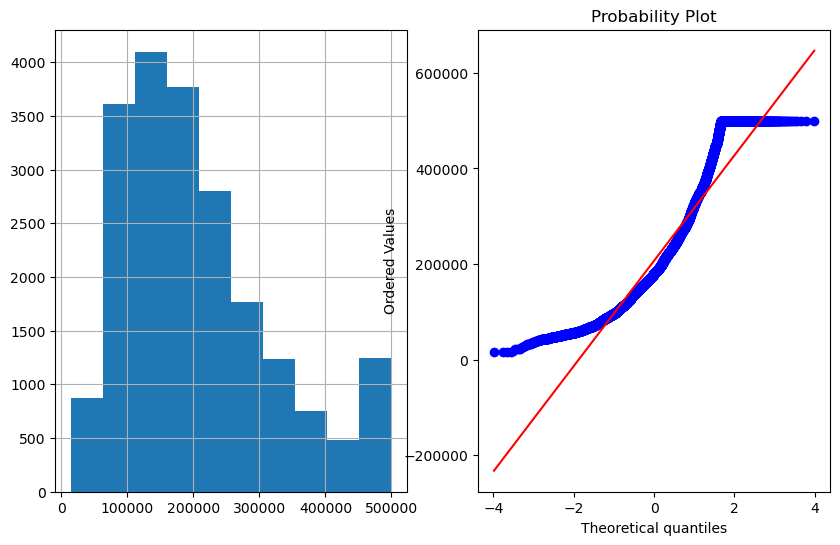

In [74]:
plot_both(df, 'median_house_value')

In [75]:
### if my target feature also had the outliers, 
### I would have removed them for the distance based and ANN algorithms

### making the respective copies of the dataset

In [77]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.2000,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.2000,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [79]:
df['median_income_clean'] = df['median_income']

In [80]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household,median_income_clean
0,-122.23,37.88,41.0,8.2000,452600.0,2,6,2,1,6,8.2000
1,-122.22,37.86,21.0,8.2000,358500.0,2,6,2,0,6,8.2000
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8,7.2574
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5,5.6431
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6,3.8462


In [81]:
df['median_income'] = df_copy['median_income']

In [90]:
df['median_income'].max()

15.0001

In [85]:
df_copy['median_income_clean'] = df['median_income_clean']

In [86]:
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_clean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,8.2000
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.2000
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.8462


In [87]:
df_copy['median_income_clean'].max()

8.2

### ---------for the trees----------------

In [88]:
### this dataset is now in perfect condition for the tree based models as well
### for the Naive Baye's algorithm

In [89]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household,median_income_clean
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6,8.2000
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6,8.2000
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8,7.2574
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5,5.6431
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6,3.8462


In [91]:
df.drop('median_income_clean', axis = 1, inplace = True)

In [92]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [94]:
df.to_csv('../data Cleaned/housing_trees.csv')

### -----------for distance based models and ANN--------------

In [95]:
### now for the distance based models, I will be using the 
### median_income_clean column, and for other columns I am applying the scaler

In [96]:
df = pd.read_csv('../data Cleaned/housing_trees.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [97]:
df.drop(['Unnamed: 0', 'median_income'], axis = 1, inplace = True)
df.head()

,longitude,latitude,housing_median_age,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,342200.0,2,5,2,1,6


In [98]:
df['median_income'] = df_copy['median_income_clean']
df.head()

,longitude,latitude,housing_median_age,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household,median_income
0,-122.23,37.88,41.0,452600.0,2,6,2,1,6,8.2000
1,-122.22,37.86,21.0,358500.0,2,6,2,0,6,8.2000
2,-122.24,37.85,52.0,352100.0,2,7,2,1,8,7.2574
3,-122.25,37.85,52.0,341300.0,2,5,2,1,5,5.6431
4,-122.25,37.85,52.0,342200.0,2,5,2,1,6,3.8462


In [99]:
df['median_income'].max()

8.2

### scaling the features

In [100]:
df_subset = df[['longitude', 'latitude', 'housing_median_age', 'median_house_value', 'median_income']]

In [101]:
df_subset.head()

,longitude,latitude,housing_median_age,median_house_value,median_income
0,-122.23,37.88,41.0,452600.0,8.2000
1,-122.22,37.86,21.0,358500.0,8.2000
2,-122.24,37.85,52.0,352100.0,7.2574
3,-122.25,37.85,52.0,341300.0,5.6431
4,-122.25,37.85,52.0,342200.0,3.8462


In [102]:
df_subset.shape

(20640, 5)

### applying the min max scaler to range the feature between 0 and 1

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df_subset_scaled = scaler.fit_transform(df_subset)

In [107]:
df_subset_scaled

array([[0.21115538, 0.5674814 , 0.78431373, 0.90226638, 1.        ],
       [0.21215139, 0.565356  , 0.39215686, 0.70824656, 1.        ],
       [0.21015936, 0.5642933 , 1.        , 0.69505074, 0.87758601],
       ...,
       [0.31175299, 0.73219979, 0.31372549, 0.15938285, 0.15585512],
       [0.30179283, 0.73219979, 0.33333333, 0.14371281, 0.17756912],
       [0.30976096, 0.72582359, 0.29411765, 0.15340349, 0.24528253]])

In [108]:
df_subset_scaled.shape

(20640, 5)